# Univariate Colorbars

Univariate colorbars are essential for visualizing scalar data in a meaningful way. 

pycolorbar holds a colorbar registry making it easy to work with a consistent set of colorbars across different visualizations. The colorbars configurations can be saved into YAML files and re-used/re-registered across various projects. 

In this tutorial, we'll explain how to utilize pycolorbar to define, manipulate, validate and register the colorbars configurations designed for your data visualization.


### Colorbar configuration

The pycolorbar univariate colorbar configuration is orchestrated by three components: `cmap`, `norm` and `cbar`.
Each component plays a critical role in defining the appearance and behavior of colorbars used to visually represent your data.
Here below we details the parameters to customize your colorbars:

#### Colormap: `cmap` 
Purpose: Defines the appeareance of the color map. 

Key Elements:

- `name`: Identifier for a registered pycolorbar or matplotlib colormap.
- `n`: Sets the number of distinct colors in the colormap.
- `bad_color`: Defines the color used to represent invalid or missing data. This is useful for highlighting or hiding NaNs or masked values in the data.
- `bad_alpha`: Sets the alpha transparency for the `bad_color`. An alpha value of 0 makes the `bad_color` fully transparent (invisible), while an alpha value of 1 makes it fully opaque. This allows for fine control over how missing data is visually represented.
- `under_color`: Specifies the color to use for data values that are below the lower limit of the colormap. This can be used to highlight values that are too small to fit within the normal range of the colormap.
- `under_alpha`: Sets the alpha transparency for the `under_color`, allowing you to control the visibility of values below the colormap's range.
- `over_color`: Specifies the color to use for data values that exceed the upper limit of the colormap. This is useful for drawing attention to values that surpass the expected range.
- `over_alpha`: Sets the alpha transparency for the `over_color`, providing control over how prominently you wish to display values above the colormap's range.


#### Data normalizer: `norm`
Purpose: Defines how data values are normalized (i.e. into the 0-1 range) for color mapping.

Key Elements:

- `name`: Identifier for the Matplotlib norm. 
- Other arguments expected or allowed by the specified Matplotlib norm. 

Currently pycolorbar enable the use of the following matplotlib norms:

- [Norm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html)
- [NoNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.NoNorm.html)
- [BoundaryNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.BoundaryNorm.html)
- [TwoSlopeNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html)
- [LogNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LogNorm.html)
- [SymLogNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.SymLogNorm.html)
- [PowerNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.PowerNorm.html)
- [CenteredNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.CenteredNorm.html)
- [AsinhNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.AsinhNorm.html)

Additionaly, pycolorbar provide some custom norms: 

- `CategoryNorm`: enable to define the norm for a categorical colorbar by specifiying the category `labels` arguments. 


#### Colorbar aesthetics: `cbar`  
Purpose: Configures the appearance and labeling of the colorbar itself.
    
Key Elements:

- `extend`: Controls if the colorbar extends beyond its limits to show out-of-bounds data.
- `label`: The title for the colorbar, usually indicating the data units or quantity.
- `ticks`: and ticklabels: Customize the placement and labels of ticks on the colorbar.

Read the [matplotlib.colorbar.Colorbar documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar)
too discover others allowed parameters.

--------------------------------------------------------------------------------------------------------------------

We will now explore how to utilize the pycolorbar package to register, manage, validate, and visualize univariate colorbars.

First of all, let's start by importing the necessary functions and libraries

In [1]:
import os
import pycolorbar
from pprint import pprint
# Here we first register some pycolorbar colormaps 
pycolorbar.register_colormaps(os.path.join(pycolorbar.etc_directory, "colormaps"))

### Register configurations

To get started, let's explore what colorbars are already available in the registry:

In [2]:
# List all registered colorbars in pycolorbar
available_colorbars = pycolorbar.colorbars.names
print("Available colorbars:", available_colorbars)

Available colorbars: []


Now let's specify the directory where we have saved our colorbars configurations YAML files. 
For illustrative purposes, we have designated a directory wherein we have curated a selection of sample colorbar configurations.

In [3]:
# Specify a directory containing colorbars configurations YAML files

# dst_dir = "/path/to/your/colorbar/configs"
dst_dir = os.path.join(pycolorbar.etc_directory, "colorbars") # example colorbars directory in pycolorbar

To register all colorbars configurations YAML files located within a specified directory, you can use `pycolorbar.register_colorbars`:

In [4]:
# Register all colorbars configurations YAML files located in a directory
pycolorbar.register_colorbars(dst_dir)

# Verify the colorbars are registered
print("Colormaps after registration:", pycolorbar.colorbars.names)

Colormaps after registration: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


If when we register new colorbars we are overwriting pre-registered colorbars, by default pycolorbar raise a warning: 

In [5]:
pycolorbar.register_colorbars(dst_dir)

To silence the warning, you can specify the argument `verbose=False`:

In [6]:
pycolorbar.register_colorbars(dst_dir, verbose=False)

To instead avoid overwriting, you can specify the argument `force=False`. If an existing colorbar is gonna to be overwritten, an informative error is raised.

In [7]:
# pycolorbar.register_colormaps(dst_dir, force=False)

If you aim to register only a specific colorbar configurations YAML file, you can use the `pycolorbars.register_colorbar` function:

In [8]:
cbar_dicts_filepath = os.path.join(pycolorbar.etc_directory, "colorbars", "example_colorbar_configurations.yaml")
pycolorbar.register_colorbar(cbar_dicts_filepath)
print("Registered colorbars:", pycolorbar.colorbars.names)

Registered colorbars: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


### Unregister configurations

If you need to remove a colorbar from the registry, you can use the `unregister` method:

In [9]:
# Unregister a specific colorbar
pycolorbar.colorbars.unregister("discrete_colorbar")

# Check the current list of registered colorbars
print("Colormaps after unregistering 'discrete_colorbar':", pycolorbar.colorbars.names)

Colormaps after unregistering 'discrete_colorbar': ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'probability', 'referenced_colorbar']


### Reset the registry

You can reset the entire colorbar registry with: 

In [10]:
pycolorbar.colorbars.reset()
print("Colorbars after resetting the registry:", pycolorbar.colorbars.names)

Colorbars after resetting the registry: []


Now let's register again the sample colorbars configurations to proceed with the tutorial:

In [11]:
pycolorbar.register_colorbar(cbar_dicts_filepath)
print("Colorbars after resetting the registry:", pycolorbar.colorbars.names)

Colorbars after resetting the registry: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


### Read configurations

Now let's have a look on how to read a colorbars configurations YAML file into a python dictionary.

The `read_cmap_dicts` function enable to read the "raw" colorbar dictionaries saved to a YAML file.

In [12]:
from pycolorbar.settings.colorbar_io import read_cbar_dicts

In [13]:
# Read the raw colorbars configurations file
cbar_dicts = read_cbar_dicts(cbar_dicts_filepath)

# List the name of the colorbars defined in the dictionary
print(list(cbar_dicts))

['discrete_colorbar', 'category_colorbar', 'continuous_colorbar', 'referenced_colorbar', 'continuous_log_colorbar', 'combined_colorbar', 'probability']


Now, let's visualize the raw dictionary of one of the available colorbar configuration:

In [14]:
name = "continuous_colorbar"
pprint(cbar_dicts[name])

{'auxiliary': {'category': ['example', 'continuous']},
 'cbar': {'extend': 'both', 'extendfrac': 0.05, 'label': 'Continuous Colorbar'},
 'cmap': {'bad_alpha': 0.5, 'bad_color': 'none', 'name': 'Spectral_r'},
 'norm': {'name': 'Norm', 'vmax': 50, 'vmin': 10}}


The validated colorbar dictionary can be retrieve directly from the colorbars registry. 
Note how some fields have been added with sensible defaults value.

In [15]:
name = "continuous_colorbar"
cbar_dict = pycolorbar.colorbars.get_cbar_dict(name)
pprint(cbar_dict)

{'auxiliary': {'category': ['example', 'continuous']},
 'cbar': {'drawedges': False,
          'extend': 'both',
          'extendfrac': 0.05,
          'extendrect': False,
          'label': 'Continuous Colorbar',
          'shrink': 1,
          'spacing': 'uniform',
          'ticklabels': None,
          'ticklocation': 'auto',
          'ticks': None},
 'cmap': {'bad_alpha': 0.5,
          'bad_color': 'none',
          'n': None,
          'name': 'Spectral_r',
          'over_alpha': None,
          'over_color': None,
          'under_alpha': None,
          'under_color': None},
 'norm': {'clip': False, 'name': 'Norm', 'vmax': 50.0, 'vmin': 10.0}}


### Add temporary configurations

The colorbar registry `add_cbar_dict` allows to temporary add a single colorbar configuration to the registry.

In [16]:
pycolorbar.colorbars.add_cbar_dict(cbar_dict, name="my_custom_colorbar")

In [17]:
# Let's check the custom colorbar dictionary has been added to the registry
assert "my_custom_colorbar" in pycolorbar.colorbars

### Reference configurations

For variables with different names that require identical visualization styles, you can create colorbar configurations that reference to another colorbar configuration. 

What you need to do is to just specify the name of the `reference` colorbar as follow:


In [18]:
cbar_dict = {"reference": "discrete_colorbar"} 
pycolorbar.colorbars.add_cbar_dict(cbar_dict, name="my_reference_colorbar")

### Validate configurations
If you aims to define your own colorbar configuration dictionary, you can validate it with:

In [19]:
validated_cbar_dict = pycolorbar.validate_cbar_dict(cbar_dict, name="continuous_colorbar")
pprint(cbar_dict)

{'reference': 'discrete_colorbar'}


To validate the registered colorbar configurations you can use the `pycolorbar.colorbars.validate` method.

In [20]:
pycolorbar.colorbars.validate("my_reference_colorbar") # validate a specific colorbar
pycolorbar.colorbars.validate("my_custom_colorbar") # validate a specific colorbar
pycolorbar.colorbars.validate() # validate all colorbars in the registry

### Save configurations

Colorbars configurations can be saved to YAML files. 
A YAML file is allowed to contains the the configuration of multiple colorbars. 

In contrast to the pycolorbar **colormap configuration YAML file**  where the filename gives the name to the colormap, the name of a **colorbars configurations YAML file**  does not matter.
 
You can save all registered colorbar configurations to a single YAML file to disk with:

In [21]:
filepath = "/tmp/all_colorbars_configuration.yaml"
pycolorbar.colorbars.to_yaml(filepath=filepath, force=True)

Or alternatively, you can write to disk a subset of the registered colorbar configurations by specifying the `names`:

In [22]:
filepath = "/tmp/subset_colorbars_configuration.yaml"
names = ["discrete_colorbar", "my_reference_colorbar"]
pycolorbar.colorbars.to_yaml(names=names, filepath=filepath, force=True)

In [23]:
# Let's check the written YAML file
cbar_dicts = read_cbar_dicts(filepath)
pprint(cbar_dicts)

{'discrete_colorbar': {'auxiliary': {'category': ['example', 'discrete']},
                       'cbar': {'drawedges': False,
                                'extend': 'max',
                                'extendfrac': 'auto',
                                'extendrect': False,
                                'label': 'Discrete Colorbar',
                                'shrink': 1,
                                'spacing': 'uniform',
                                'ticklabels': None,
                                'ticklocation': 'auto',
                                'ticks': None},
                       'cmap': {'bad_alpha': 0.2,
                                'bad_color': 'gray',
                                'n': 16,
                                'name': 'STEPS-MCH',
                                'over_alpha': None,
                                'over_color': 'darkred',
                                'under_alpha': None,
                                'under_co

### Colorbars categories

pycolorbar provides a way to retrieve a custom selection of registered colorbars according to the categories specified in the `auxiliary/category` field of the colorbar configuration.

For example, the `"discrete_colorbar"` `auxiliary/category` field contains the categories `['example', 'discrete']`.

With the `available_colorbars` function we can retrieve the list of colorbars belonging to a given category: 

In [24]:
pycolorbar.available_colorbars(category="discrete")

['discrete_colorbar', 'my_reference_colorbar']

With `exclude_referenced=True` it is possible to exclude the colorbars configurations that point to others configurations: 

In [25]:
pycolorbar.available_colorbars(category="discrete", exclude_referenced=True)

['discrete_colorbar']

By default, `available_colorbars` return the list of all registered colorbar configurations.

In [26]:
pycolorbar.available_colorbars()

['category_colorbar',
 'combined_colorbar',
 'continuous_colorbar',
 'continuous_log_colorbar',
 'discrete_colorbar',
 'my_custom_colorbar',
 'my_reference_colorbar',
 'probability',
 'referenced_colorbar']

### Visualize colorbars

To visualize the appearance of a single colorbar, you can use `pycolorbar.show_colorbar`:

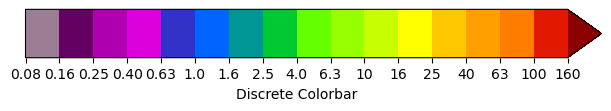

In [27]:
pycolorbar.show_colorbar("discrete_colorbar")

To visualize the matplotlib colormap of a colorbar configuration, you can call the `get_cmap` method of the colorbar registry:

In [37]:
cmap = pycolorbar.colorbars.get_cmap("discrete_colorbar")
cmap

To visualize all registered colorbars (that do not reference to another configuration), you can use `pycolorbar.show_colorbars`:

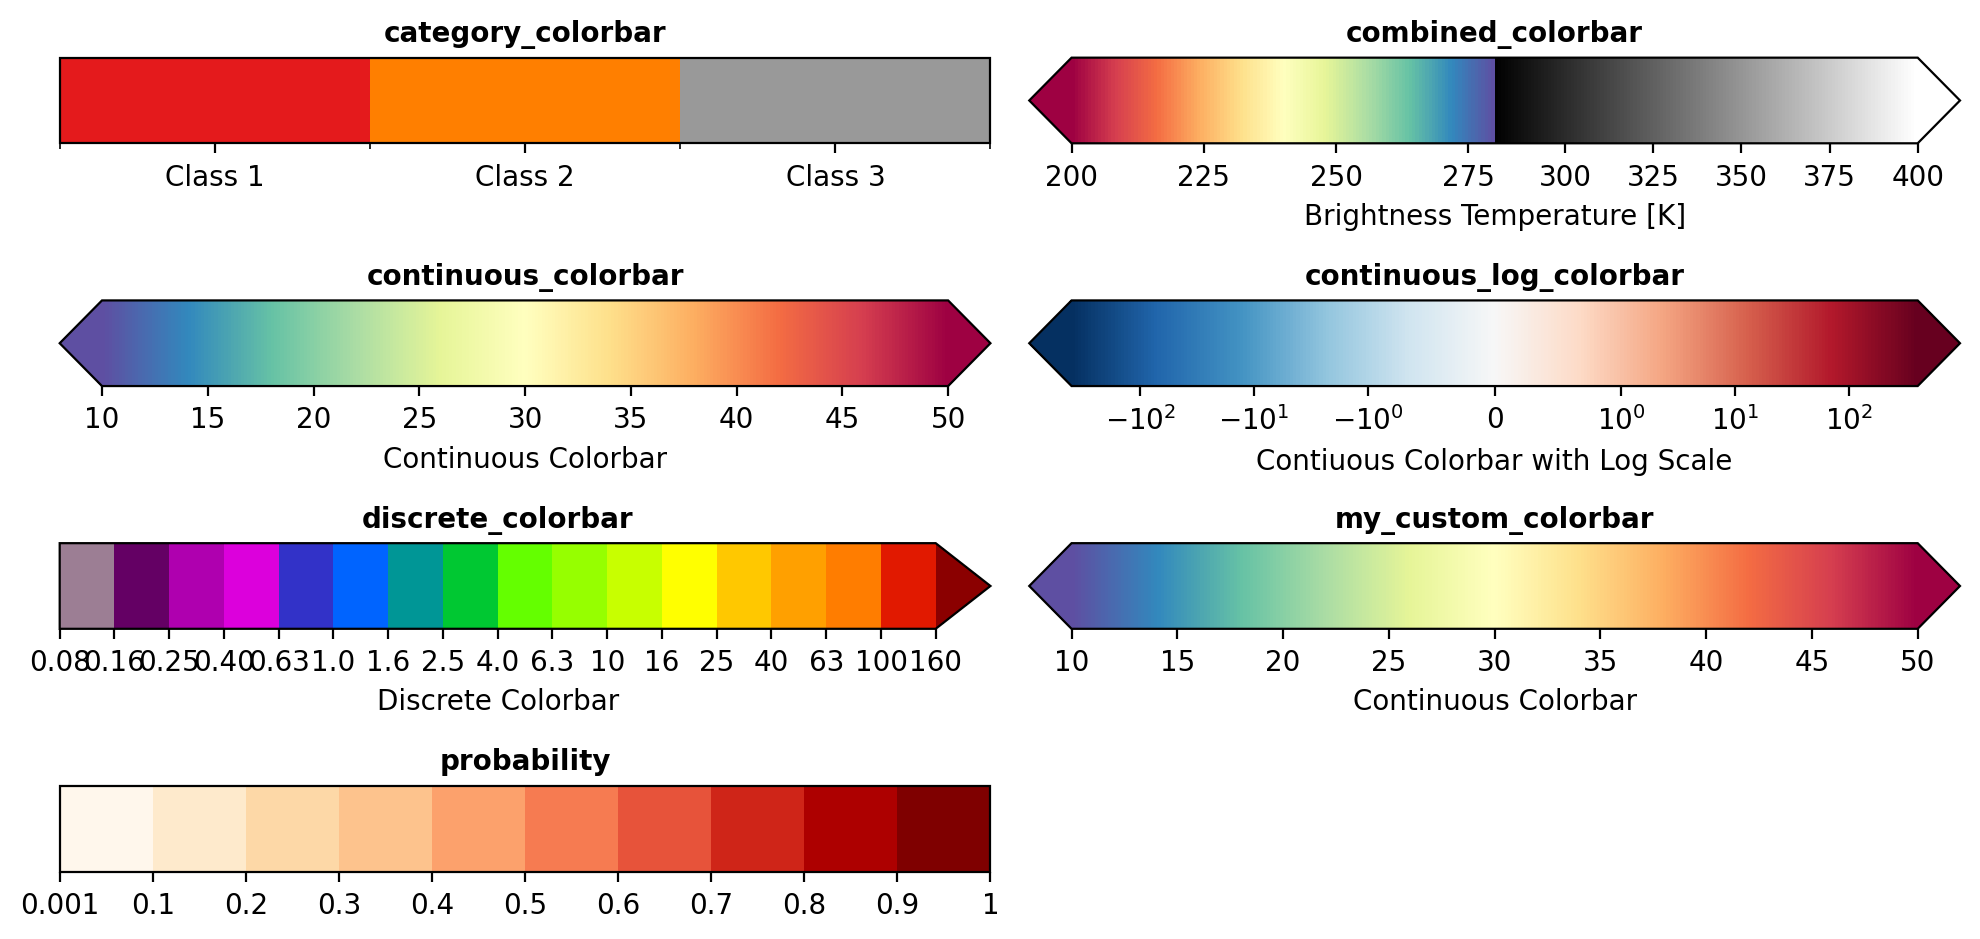

In [29]:
pycolorbar.show_colorbars()

It's also possible to subset the colorbars to display with the `category` and `exclude_referenced` parameters:

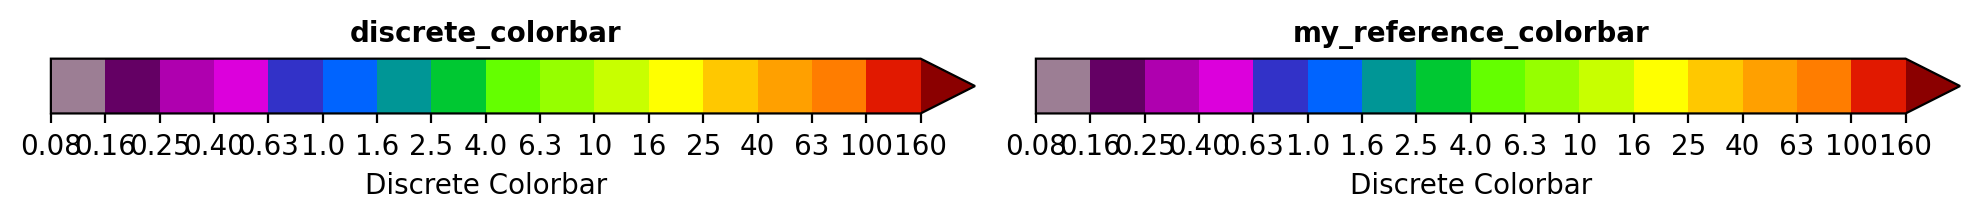

In [30]:
pycolorbar.show_colorbars(category="discrete", exclude_referenced=False)

When you define your colorbars, please consider to add the relevant categories to the `auxiliary/category`field of the colorbar configuration !

### Customize colorbars defaults

pycolorbar offers a way to directly experiment how the default colorbar configuration is modified based on user arguments.
Here below we provide some examples:

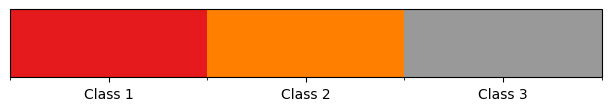

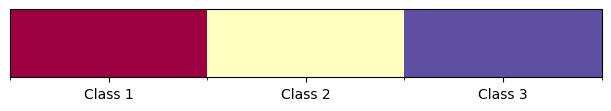

The default pycolorbar norm is a <class 'matplotlib.colors.BoundaryNorm'> and does not accept 'vmin' and 'vmax'.
 Switching the norm to Normalize(vmin=0, vmax=3) !


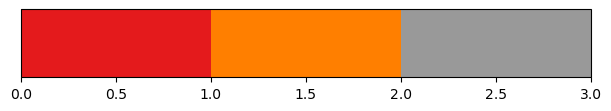

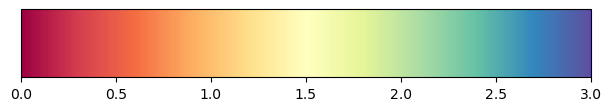

In [31]:
from matplotlib.colors import Normalize
pycolorbar.show_colorbar("category_colorbar")
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"cmap": "Spectral"})  # change colormap, labels conserved !
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"vmin": 0, "vmax": 3}) # change norm, but colormap conserved !
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"cmap": "Spectral", "norm": Normalize(vmin=0, vmax=3)})

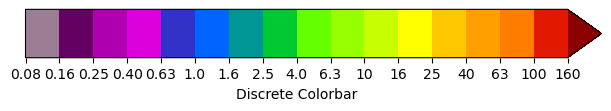

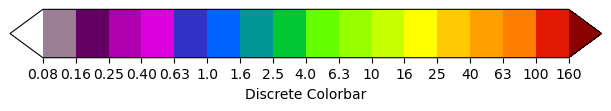

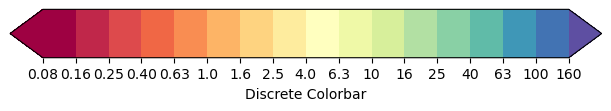

In [32]:
pycolorbar.show_colorbar("discrete_colorbar")
pycolorbar.show_colorbar("discrete_colorbar", user_cbar_kwargs={"extend": "both"})
pycolorbar.show_colorbar("discrete_colorbar", user_plot_kwargs={"cmap": "Spectral"}, user_cbar_kwargs={"extend": "both"})

### Customized matplotlib plots

As you have just seen here above, pycolorbar offer a way to edit the default colorbars configurations based on additional user arguments.
Here below, we show how to use the `get_plot_kwargs` to easily customize matplotlib-based plots. 
The following example also holds for `cartopy`, `xarray` and `geopandas` plots.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Let's simulate a 2D array with linear gradients
width = 100
height = 100
# Horizontal gradient
horizontal_gradient = np.linspace(0, 100, width)
image_horizontal = np.tile(horizontal_gradient, (height, 1))
# Vertical gradient
vertical_gradient = np.linspace(0, 100, height).reshape(-1, 1)
image_vertical = np.tile(vertical_gradient, (1, width))
# Diagonal gradient by averaging horizontal and vertical gradients
image = (image_horizontal + image_vertical) / 2

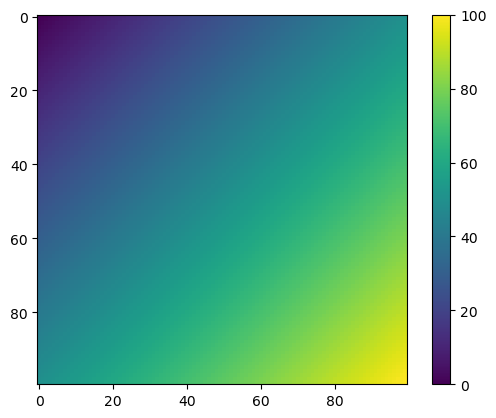

In [34]:
# Default matplotlib plot
plt.imshow(image)
plt.colorbar()

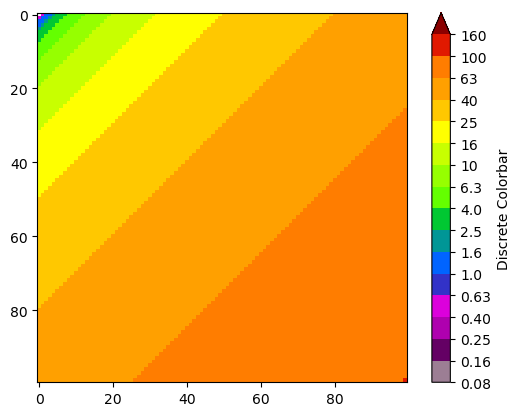

In [35]:
# Retrieve plot and colorbar kwargs defaults using pycolorbar
plot_kwargs, cbar_kwargs = pycolorbar.get_plot_kwargs(name="discrete_colorbar")
# Plot 
plt.imshow(image, **plot_kwargs)
ticklabels = cbar_kwargs.pop("ticklabels")
cbar = plt.colorbar(**cbar_kwargs)
cbar.set_ticklabels(ticklabels)

The default pycolorbar norm is a <class 'matplotlib.colors.BoundaryNorm'> and does not accept 'vmin' and 'vmax'.
 Switching the norm to Normalize(vmin=0, vmax=100) !


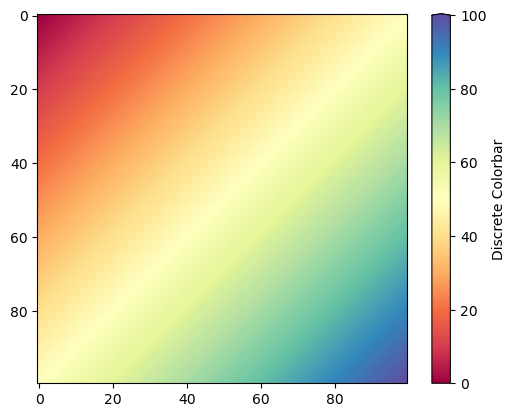

In [36]:
# Retrieve customized plot and colorbar kwargs using pycolorbar
plot_kwargs, cbar_kwargs = pycolorbar.get_plot_kwargs(name="discrete_colorbar", 
                                                      user_plot_kwargs={"cmap": "Spectral", "vmin": 0, "vmax": 100})
# Plot 
plt.imshow(image, **plot_kwargs)
plt.colorbar(**cbar_kwargs)